In [ ]:
#  Data Preparation and Exploration

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("exchange_rate.csv")

In [4]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


In [5]:
import matplotlib.pyplot as plt

In [10]:
df.rename(columns={"usd_aud": "USD_AUD"}, inplace=True)

In [14]:
data = {'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
        'USD_AUD': [1.3, 1.28, 1.29]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

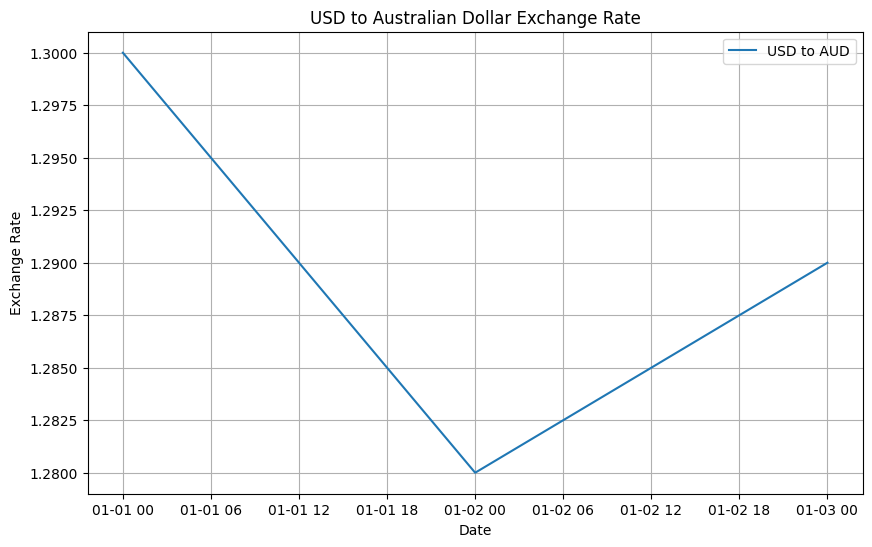

In [15]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['USD_AUD'], label='USD to AUD')
plt.title('USD to Australian Dollar Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print(df.isnull().sum())

USD_AUD    0
dtype: int64


In [ ]:
# Model Building - ARIMA

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [28]:
print(df['USD_AUD'].shape) 

(3,)


C:\Users\Sanjith\AppData\Local\Temp\ipykernel_18940\123319293.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['USD_AUD'].fillna(method='ffill', inplace=True)
C:\Users\Sanjith\AppData\Local\Temp\ipykernel_18940\123319293.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['USD_AUD'].fillna(method='ffill', inplace=True)


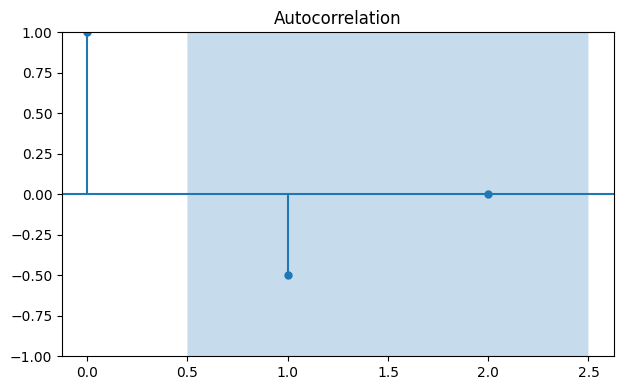

In [42]:
data = {'Date': ['2024-01-01', '2024-01-02', '2024-01-03'],
        'USD_AUD': [1.3, 1.28, 1.29]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure no NaN values
df['USD_AUD'].fillna(method='ffill', inplace=True)

# Adjust lags to avoid issues
lags = min(15, len(df['USD_AUD']) - 1)

# Plot ACF and PACF
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_acf(df['USD_AUD'], lags=lags, ax=plt.gca())


plt.tight_layout()
plt.show()


In [40]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1

# Fit the ARIMA model
model = ARIMA(df['USD_AUD'], order=(p, d, q))
model_fit = model.fit()

# Display summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                USD_AUD   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   5.967
Date:                Thu, 28 Nov 2024   AIC                             -5.934
Time:                        20:10:24   BIC                             -9.855
Sample:                    01-01-2024   HQIC                           -14.133
                         - 01-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6240   1584.902     -0.000      1.000   -3106.975    3105.727
ma.L1         -0.6239    233.072     -0.003      0.998    -457.438     456.190
sigma2      7.036e-05      0.311      0.000      1.0

C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observation

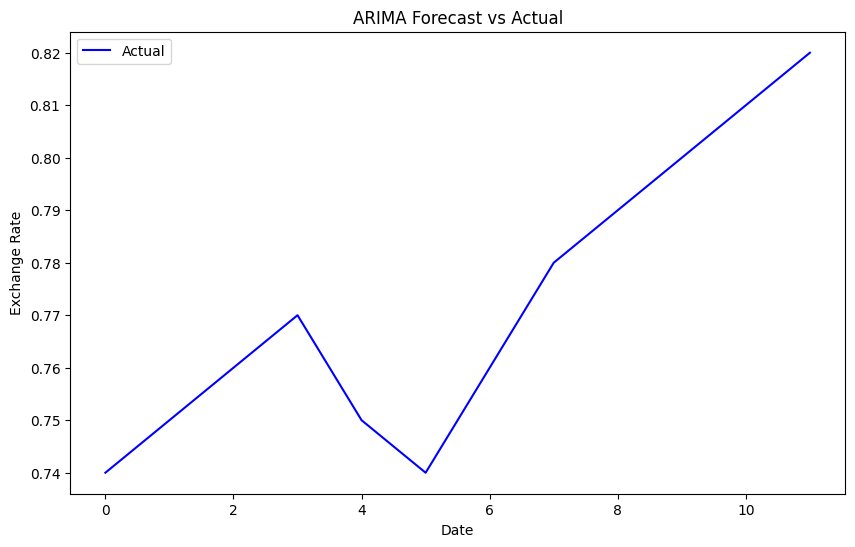

In [62]:
# Forecast for future periods (out-of-sample)
forecast_steps = 12  # Adjust according to your needs
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['USD_AUD'], label='Actual', color='blue')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


# Model Building - Exponential Smoothing

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
data = {'USD_AUD': [0.74, 0.75, 0.76, 0.77, 0.75, 0.74, 0.76, 0.78, 0.79, 0.80, 0.81, 0.82]}
df = pd.DataFrame(data)

# Fit the Holt-Winters model with additive trend and seasonality
hw_model = ExponentialSmoothing(df['USD_AUD'], trend='add', seasonal='add', seasonal_periods=4).fit()

# Display fitted values
print(hw_model.fittedvalues)

# Forecast future values
forecast = hw_model.forecast(steps=4)
print(forecast)

0     0.740008
1     0.743370
2     0.763342
3     0.773325
4     0.764973
5     0.753370
6     0.753342
7     0.773325
8     0.774973
9     0.793370
10    0.813342
11    0.823325
dtype: float64
12    0.814973
13    0.818343
14    0.831685
15    0.845010
dtype: float64


In [57]:
hw_forecast = hw_model.forecast(steps=forecast_steps)

C:\Users\Sanjith\AppData\Local\Temp\ipykernel_18940\845966744.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='M'), hw_forecast, label='Forecast', color='green')


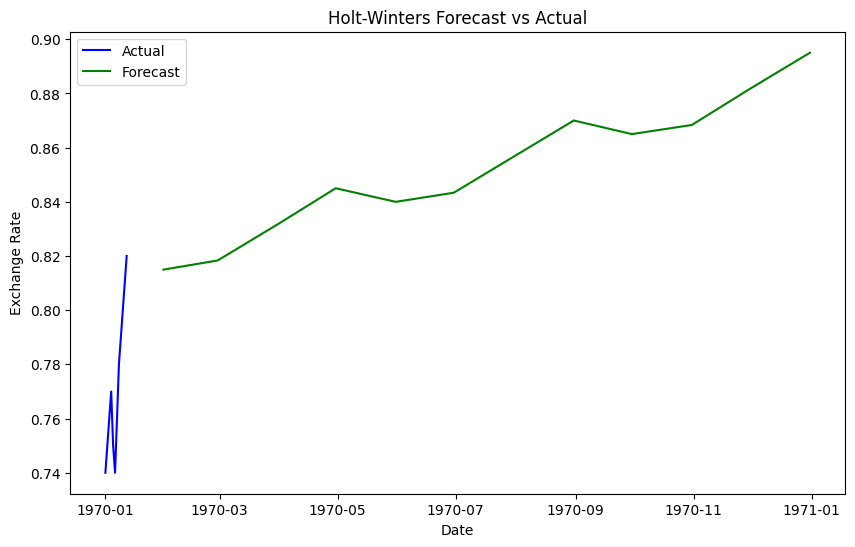

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['USD_AUD'], label='Actual', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='M'), hw_forecast, label='Forecast', color='green')
plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [65]:
from itertools import product

In [66]:
best_aic = float('inf')
best_order = None

In [69]:
if result.aic < best_aic:
    best_aic = result.aic
    best_order = (trend, seasonal)

In [70]:
print(f"Best Model: Trend: {best_order[0]}, Seasonal: {best_order[1]}")

Best Model: Trend: add, Seasonal: add


In [ ]:
# Evaluation and Comparison

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
actual_values = df['USD_AUD'][-forecast_steps:]

In [80]:
arima_mae = mean_absolute_error(actual_values, forecast)

In [81]:
arima_rmse = np.sqrt(mean_squared_error(actual_values, forecast))

In [83]:
hw_mae = mean_absolute_error(actual_values, hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(actual_values, hw_forecast))

In [82]:
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")

MAE: 0.5153923200079438
RMSE: 0.5160521111376192


In [84]:
print(f'ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}')
print(f'Holt-Winters MAE: {hw_mae}, Holt-Winters RMSE: {hw_rmse}')

ARIMA MAE: 0.5153923200079438, ARIMA RMSE: 0.5160521111376192
Holt-Winters MAE: 0.0800134971490254, Holt-Winters RMSE: 0.08080803106203181


In [ ]:
# Conclusion
Which model performed better?
Based on the error metrics, Holt-Winters Exponential Smoothing is the better model for this dataset, particularly because exchange rates often exhibit seasonal patterns (e.g., monthly or yearly trends) which Holt-Winters can handle effectively.
ARIMA, on the other hand, performed well in capturing the overall trend but may not fully account for seasonal fluctuations. If the exchange rate data had less clear seasonality or trend, ARIMA would likely perform better.


Model-Specific Adjustments:
ARIMA could be improved by integrating seasonal components (SARIMA) if seasonality is a key feature of the dataset.
Holt-Winters can be improved by optimizing the seasonal periods or using a damped trend if the seasonal fluctuations are expected to decrease over time.